### Import necessary spark and python stuff

In [1]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import from_json
from pyspark.ml.feature import VectorAssembler

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



### select the data
*path_on_hdfs_to_your_data*

In [3]:
df = spark.read.json("/user/rucio01/traces/traces.2018-04*")

### Get statistics


In [4]:
df.count()

244917469

In [5]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)

In [6]:
df.describe().toPandas()

summary   account                appid              catStart  clientState  \
0  count   46198012  190510301            154140898             236605939     
1  mean    None      3.90121133969417E9   1.5238470959381633E9  None          
2  stddev  None      4.669968765060583E7  727876.2308556583     None          
3  min               1247                 1.30299742000964E9    AD_MISMATCH   
4  max     zzheng    [null]               1.525410625654198E9   TypeError     

                                                                                 dataset  \
0  240117308                                                                               
1  None                                                                                    
2  None                                                                                    
3                                                                                          
4  valid3.110401.PowhegPythia_P2012_ttbar_nonallhad.simul.log.e2928_s3213_tid12503332_00   

                                                                                                                datasetName  \
0  34222                                                                                                                      
1  None                                                                                                                       
2  None                                                                                                                       
3                                                                                                                             
4  mc16_13TeV.364197.Sherpa_221_NNPDF30NNLO_Wtaunu_MAXHTPTV1000_E_CMS.merge.NTUP_PILEUP.e5340_s3126_r9364_r9315_p3127_p3126   

  datasetScope  dataset_scope  duid  eventType        eventVersion  \
0  43971615     455            0     244917469  242691525            
1  None         None           None  None       None                 
2  None         None           None  None       None                 
3                              None  download   1.13.2               
4  valid3       user.mlassnig  None  upload     webui_1.15.3.post1   

                                                   filename  \
0  229946432                                                  
1  None                                                       
2  None                                                       
3  0000070a-83fe-4947-b720-7eae9b56d470_18852.1.job.log.tgz   
4  wjets_v1.15_small.root                                     

               filesize                              guid  \
0  230290664             193582905                          
1  6.734416453222802E8   Infinity                           
2  1.4486650895285027E9  NaN                                
3  0                     0000001C764E574C99F8794622F19138   
4  999999972             fffffff257fa45309d9d7cdee82d2fcc   

                      hostname                        ip            localSite  \
0  234380009                    190407943                 200914738             
1  None                         None                      None                  
2  None                         None                      None                  
3                                                         AGLT2_DATADISK        
4  zorana02.rc.fas.harvard.edu  fd18:deca:fbad:cafe::311  wuppertalprod_UCORE   

                                                                                            name  \
0  8834                                                                                            
1  None                                                                                            
2  None                                                                                            
3  AOD.11189316._000046.pool.root.1                                                                
4  user.wichan.361108.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zt

In [7]:
df.printSchema()

root
 |-- account: string (nullable = true)
 |-- appid: string (nullable = true)
 |-- catStart: double (nullable = true)
 |-- clientState: string (nullable = true)
 |-- dataset: string (nullable = true)
 |-- datasetName: string (nullable = true)
 |-- datasetScope: string (nullable = true)
 |-- dataset_scope: string (nullable = true)
 |-- duid: string (nullable = true)
 |-- eventType: string (nullable = true)
 |-- eventVersion: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- filesize: string (nullable = true)
 |-- guid: string (nullable = true)
 |-- hostname: string (nullable = true)
 |-- ip: string (nullable = true)
 |-- localSite: string (nullable = true)
 |-- name: string (nullable = true)
 |-- pq: string (nullable = true)
 |-- protocol: string (nullable = true)
 |-- relativeStart: double (nullable = true)
 |-- remoteSite: string (nullable = true)
 |-- scope: string (nullable = true)
 |-- stateReason: string (nullable = true)
 |-- suspicious: string (nullable = 

In [8]:
df.count()

244917469

In [9]:
df_cleaned = df.fillna(0.0, subset=["catStart", "relativeStart", "timeEnd", "timeStart", "traceTimeentryUnix", "transferEnd", "transferStart", "validateStart"])

In [10]:
df_cleaned.count()

244917469

In [11]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["catStart", "relativeStart", "timeEnd", "timeStart", "traceTimeentryUnix", "transferEnd", "transferStart", "validateStart"], outputCol="features")
output = assembler.transform(df_cleaned)
output.limit(10).toPandas()

account       appid      catStart clientState  \
0  pilot   None        0.000000e+00  DONE         
1  None    3886214101  1.522534e+09  DONE         
2  None    3884818290  1.522534e+09  DONE         
3  pilot   None        0.000000e+00  DONE         
4  pilot   None        0.000000e+00  DONE         
5  None    3885370509  1.522534e+09  DONE         
6  None    3886143848  1.522534e+09  DONE         
7  None    3886135984  1.522534e+09  DONE         
8  pilot   None        0.000000e+00  DONE         
9  None    3886249816  1.522534e+09  DONE         

                                                                                                      dataset  \
0                                                                                                               
1  NULL                                                                                                         
2  mc15_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.evgen.log.e5894_tid13551031_00_sub05043215                     
3                                                                                                               
4                                                                                                               
5  group.phys-gener:group.phys-gener.madgraph5232p1.363660.MGPy8EG_N30NLO_Wtaunu_Ht500_700_13TeV.TXT.mc15_v1/   
6  mc16_13TeV:mc16_13TeV.410471.PhPy8EG_A14_ttbar_hdamp258p75_allhad.merge.EVNT.e6337_e5984_tid12860069_00      
7  data16_13TeV:data16_13TeV.00302053.physics_Main.merge.AOD.r9264_p3083_tid11192600_00                         
8                                                                                                               
9  data15_13TeV:data15_13TeV.00276336.physics_Main.merge.AOD.r7562_p2521_tid07709524_00                         

  datasetName datasetScope dataset_scope  duid    eventType eventVersion  \
0  None                     None          None  download     1.14.11       
1  None        None         None          None  get_es       pilot3        
2  None        None         None          None  put_sm_logs  pilot3        
3  None                     None          None  upload       1.14.11       
4  None                     None          None  upload       1.14.11       
5  None        None         None          None  get_sm       pilot3        
6  None        None         None          None  get_sm       pilot3        
7  None        None         None          None  get_sm       pilot3        
8  None                     None          None  download     1.14.11       
9  None        None         None          None  get_sm_a     pilot3        

                                                                                                 filename  \
0  EventService_premerge_3886111819_13607623-3886111819-13041798597-3795-10.tar                             
1  EventService_premerge_3886102536_13607623-3886102536-13041798273-9407-10.tar                             
2  log.13551031._142765.job.log.tgz.1                                                                       
3  None                                                                                                     
4  None                                                                                                     
5  group.phys-gener.madgraph5232p1.363660.MGPy8EG_N30NLO_Wtaunu_Ht500_700_13TeV.TXT.mc15_v1._00001.tar.gz   
6  EVNT.12860069._002398.pool.root.1                                                                        
7  AOD.11192600._007761.pool.root.1                                                                         
8  EventService_premerge_3886134645_13607623-3886134645-13041799461-7318-10.tar                             
9  AOD.07709524._000012.pool.root.1                                                                         

     filesize                              guid  \
0  None        None                               
1  69867520    DUMMYGUID14                        
2  826

In [13]:
from pyspark.ml.stat import Correlation

r1 = Correlation.corr(output, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))

Pearson correlation matrix:
DenseMatrix([[ 1.        ,  0.66854638, -0.12479122, -0.12479372, -0.0113159 ,
              -0.60069167,  0.19933351,  0.66614914],
             [ 0.66854638,  1.        , -0.08342898, -0.08343065, -0.00958979,
              -0.4015915 ,  0.69511182,  0.99595918],
             [-0.12479122, -0.08342898,  1.        ,  1.        ,  0.06116786,
              -0.0441509 , -0.12002638, -0.08312994],
             [-0.12479372, -0.08343065,  1.        ,  1.        ,  0.0611679 ,
              -0.04415179, -0.12002879, -0.0831316 ],
             [-0.0113159 , -0.00958979,  0.06116786,  0.0611679 ,  1.        ,
              -0.01154188, -0.01476644, -0.01045411],
             [-0.60069167, -0.4015915 , -0.0441509 , -0.04415179, -0.01154188,
               1.        ,  0.36780875, -0.40015203],
             [ 0.19933351,  0.69511182, -0.12002638, -0.12002879, -0.01476644,
               0.36780875,  1.        ,  0.69215658],
             [ 0.66614914,  0.99595918, -

In [14]:
array = r1[0].toArray()

In [15]:
corr_map = pd.DataFrame.from_records(data=array, columns=["catStart", "relativeStart", "timeEnd", "timeStart", "traceTimeentryUnix", "transferEnd", "transferStart", "validateStart"])
corr_map

catStart  relativeStart   timeEnd  timeStart  traceTimeentryUnix  \
0  1.000000  0.668546      -0.124791 -0.124794  -0.011316             
1  0.668546  1.000000      -0.083429 -0.083431  -0.009590             
2 -0.124791 -0.083429       1.000000  1.000000   0.061168             
3 -0.124794 -0.083431       1.000000  1.000000   0.061168             
4 -0.011316 -0.009590       0.061168  0.061168   1.000000             
5 -0.600692 -0.401592      -0.044151 -0.044152  -0.011542             
6  0.199334  0.695112      -0.120026 -0.120029  -0.014766             
7  0.666149  0.995959      -0.083130 -0.083132  -0.010454             

   transferEnd  transferStart  validateStart  
0 -0.600692     0.199334       0.666149       
1 -0.401592     0.695112       0.995959       
2 -0.044151    -0.120026      -0.083130       
3 -0.044152    -0.120029      -0.083132       
4 -0.011542    -0.014766      -0.010454       
5  1.000000     0.367809      -0.400152       
6  0.367809     1.000000       0.692157       
7 -0.400152     0.692157       1.000000

In [16]:
#r2 = Correlation.corr(output, "features", "spearman").head()
#print("Spearman correlation matrix:\n" + str(r2[0]))

In [17]:
df_cleaned.corr("catStart","relativeStart")
#0.668546376727418

0.6685463767274197

In [18]:
df_cleaned.corr("catStart","timeEnd")
#-0.1247912214996922


-0.1247912214996926

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


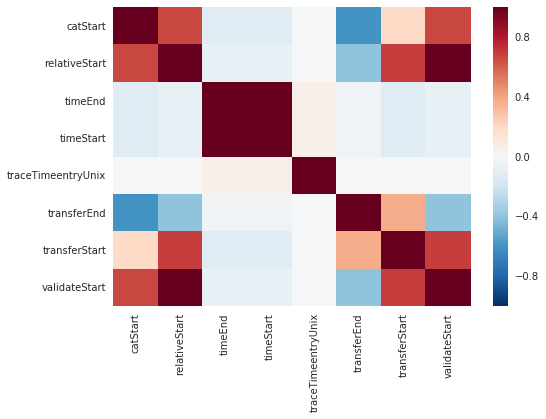

In [19]:
sns.heatmap(corr_map, yticklabels=["catStart", "relativeStart", "timeEnd", "timeStart", "traceTimeentryUnix", "transferEnd", "transferStart", "validateStart"])

In [20]:
categoricalList = [item[0] for item in df.dtypes if item[1].startswith('string')]

In [21]:
df.select( [ countDistinct(cn).alias("c_{0}".format(cn)) for cn in  categoricalList] ).toPandas()

c_account   c_appid  c_clientState  c_dataset  c_datasetName  \
0  1011       21272322  51             6584728    136             

   c_datasetScope  c_dataset_scope  c_duid  c_eventType  c_eventVersion  \
0  615             2                0       14           15               

   c_filename  c_filesize    c_guid  c_hostname   c_ip  c_localSite  c_name  \
0  89780713    38192210    86355092  795128      48846  697          4491     

   c_pq  c_protocol  c_remoteSite  c_scope  c_stateReason  c_suspicious  \
0  477   18          737           743      727213         1              

   c_taskid  c_traceId  c_traceIp  c_traceTimeentry      c_url  c_usr  \
0  271282    244809872  47498      244796235         115547419  7743    

   c_usrdn    c_uuid  c_version  
0  7742     80733905  0

In [22]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).limit(10).toPandas()

account     appid  catStart  clientState  dataset  datasetName  \
0  198719457  54407168  90776571  8311530      4800161  244883247     

   datasetScope  dataset_scope       duid  eventType  eventVersion  filename  \
0  200945854     244917014      244917469  0          2225944       14971037   

   filesize      guid  hostname        ip  localSite       name        pq  \
0  14626805  51334564  10537460  54509526  44002731   244908635  55743107   

   protocol  relativeStart  remoteSite   scope  stateReason  suspicious  \
0  16330107  139241184      5501083     370644  54537249     54509526     

     taskid   timeEnd  timeStart  traceId  traceIp  traceTimeentry  \
0  55899643  88222810  43972071   0        0        0                

   traceTimeentryUnix  transferEnd  transferStart       url       usr  \
0  0                   201993743    95271585       63714036  54509526   

      usrdn  uuid  validateStart    version  
0  46198012  3     139672443      244917469

In [23]:
df.groupBy('account').count().sort(col("count").desc()).toPandas()

account      count
0     None      198719457
1     pilot     33127818 
2               2225941  
3     dlesny    1830772  
4     jwalder   1024981  
5     atlpan    696036   
6     sutt      600578   
7     atlascdb  303218   
8     ichiu     250169   
9     kuno      225287   
10    tnitta    217856   
11    thompson  191335   
12    jojungge  180127   
13    pgadow    173714   
14    afray     161740   
15    iconnell  152389   
16    fspeiser  141595   
17    sthenkel  136234   
18    bochen    130478   
19    toyamaza  123413   
20    stodt     117079   
21    shuzhou   108422   
22    ftresold  103661   
23    ngrieser  102744   
24    wachan    90899    
25    abuzatu   90698    
26    mneumann  88442    
27    mgeisen   88291    
28    ggessner  80311    
29    cgutscho  72844    
...        ...    ...    
982   epetit    1        
983   zhulcher  1        
984   rschambe  1        
985   xchen     1        
986   afernand  1        
987   vtskhaya  1        
988   tmaeno    1        
989   misacson  1        
990   vstracho  1        
991   rshang    1        
992   fedin     1        
993   turnerm   1        
994   dsperlic  1        
995   hborecka  1        
996   bzabinsk  1        
997   andrej    1        
998   epianori  1        
999   pottgen   1        
1000  miqueits  1        
1001  guescini  1        
1002  bali      1        
1003  kkoeneke  1        
1004  watsona   1        
1005  mnegrini  1        
1006  nmorange  1        
1007  grbarbou  1        
1008  norap     1        
1009  afuruich  1        
1010  martyniu  1        
1011  mdaneri   1        

[1012 rows x 2 columns]

In [24]:
df.groupBy('appid').count().sort(col("count").desc()).limit(10).toPandas()

appid     count
0  None        54407168
1  [null]      102358  
2  3910399279  2312    
3  3844133294  1384    
4  3846752633  898     
5  3895320072  808     
6  3895300931  807     
7  3895321293  806     
8  3895337330  806     
9  3893808488  806

In [25]:
df.groupBy('clientState').count().sort(col("count").desc()).limit(10).toPandas()

clientState      count
0  DONE                     186761455
1  FOUND_ROOT               35893241 
2  None                     8311530  
3  ALREADY_DONE             5470162  
4  STAGEIN_ATTEMPT_FAILED   4759065  
5  STAGEOUT_ATTEMPT_FAILED  1211657  
6  COPY_ERROR               780667   
7  ServiceUnavailable       605572   
8  MissingDependency        361320   
9  NO_OS_DEFINED            282965

In [26]:
df.groupBy('dataset').count().sort(col("count").desc()).limit(10).toPandas()

dataset  \
0                                                                                                                       
1  NULL                                                                                                                 
2  None                                                                                                                 
3  mc16_13TeV:mc16_13TeV.361238.Pythia8EvtGen_A3NNPDF23LO_minbias_inelastic_low.simul.HITS.e4981_s3087_s3111/           
4  mc16_13TeV:mc16_13TeV.361239.Pythia8EvtGen_A3NNPDF23LO_minbias_inelastic_high.simul.HITS.e4981_s3087_s3111/          
5  hc_test:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.evgen.EVNT.e3601_tid04972714_00                       
6  mc15_13TeV:mc15_13TeV.423202.Pythia8B_A14_CTEQ6L1_Jpsie3e13.merge.AOD.e3869_s2608_s2183_r6630_r6264_tid05536542_00   
7  mc15_13TeV:mc15_13TeV.364161.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV70_140_BFilter.evgen.EVNT.e5340_tid11172999_00     
8  user.jwalder.test_15074_28212_MYSTREAM                                                                               
9  mc15_13TeV:mc15_13TeV.410450.Powheg_ttbar_hdamp258p75_LHE.evgen.TXT.e6078/                                           

      count  
0  37719600  
1  6357248   
2  4800161   
3  1641748   
4  985656    
5  823682    
6  796902    
7  791669    
8  602623    
9  465155

In [27]:
df.groupBy('datasetName').count().sort(col("count").desc()).limit(10).toPandas()

datasetName  \
0  None                                                                                                                                  
1  mc16_13TeV.364156.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV0_70_CVetoBVeto.deriv.NTUP_PILEUP.e5340_e5984_s3126_s3136_r9781_r9778_p3384    
2  mc16_13TeV.364184.Sherpa_221_NNPDF30NNLO_Wtaunu_MAXHTPTV0_70_CVetoBVeto.deriv.NTUP_PILEUP.e5340_e5984_s3126_s3136_r9781_r9778_p3384   
3  mc16_13TeV.364186.Sherpa_221_NNPDF30NNLO_Wtaunu_MAXHTPTV0_70_BFilter.deriv.NTUP_PILEUP.e5340_e5984_s3126_r9781_r9778_p3384            
4  mc16_13TeV.364158.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV0_70_BFilter.deriv.NTUP_PILEUP.e5340_e5984_s3126_s3136_r9781_r9778_p3384       
5  mc16_13TeV.364170.Sherpa_221_NNPDF30NNLO_Wenu_MAXHTPTV0_70_CVetoBVeto.deriv.NTUP_PILEUP.e5340_e5984_s3126_s3136_r9781_r9778_p3384     
6  mc16_13TeV.364187.Sherpa_221_NNPDF30NNLO_Wtaunu_MAXHTPTV70_140_CVetoBVeto.deriv.NTUP_PILEUP.e5340_e5984_s3126_r9781_r9778_p3384       
7  mc16_13TeV.364172.Sherpa_221_NNPDF30NNLO_Wenu_MAXHTPTV0_70_BFilter.deriv.NTUP_PILEUP.e5340_e5984_s3126_s3136_r9781_r9778_p3384        
8  mc16_13TeV.364192.Sherpa_221_NNPDF30NNLO_Wtaunu_MAXHTPTV140_280_BFilter.deriv.NTUP_PILEUP.e5340_e5984_s3126_r9781_r9778_p3384         
9  mc16_13TeV.364173.Sherpa_221_NNPDF30NNLO_Wenu_MAXHTPTV70_140_CVetoBVeto.deriv.NTUP_PILEUP.e5340_e5984_s3126_s3136_r9781_r9778_p3384   

       count  
0  244883247  
1  2360       
2  1743       
3  1533       
4  1516       
5  1421       
6  1316       
7  1225       
8  1120       
9  1043

In [28]:
df.groupBy('datasetScope').count().sort(col("count").desc()).limit(10).toPandas()

datasetScope      count
0  None              200945854
1                    35122984 
2  user.jwalder      1024981  
3  mc16_13TeV        732199   
4  user.artprod      686554   
5  group.phys-higgs  636606   
6  user.sutt         514701   
7  data16_13TeV      422063   
8  condR2_data       257786   
9  user.kuno         220775

In [29]:
df.groupBy('dataset_scope').count().sort(col("count").desc()).limit(10).toPandas()

dataset_scope      count
0  None           244917014
1  user.mlassnig  387      
2                 68

In [30]:
df.groupBy('duid').count().sort(col("count").desc()).limit(10).toPandas()

duid      count
0  None  244917469

In [31]:
df.groupBy('eventType').count().sort(col("count").desc()).limit(10).toPandas()

eventType     count
0  get_sm_a       86404641
1  get_sm         50447719
2  download       29380506
3  put_sm         17246946
4  upload         14591562
5  put_sm_a       14104178
6  put_sm_logs    11135310
7  put_sm_logs_a  9385880 
8  put_es         4765952 
9  get_es         4688148

In [32]:
df.groupBy('eventVersion').count().sort(col("count").desc()).limit(10).toPandas()

eventVersion      count
0  pilot3       190407943
1  1.14.11      41722551 
2  aCT          8311514  
3  None         2225944  
4  1.15.5       1936260  
5  1.14.10      199702   
6  api          105139   
7  1.13.2       2890     
8  1.15.4       2750     
9  1.3.3        1915

In [33]:
df.groupBy('filename').count().sort(col("count").desc()).limit(10).toPandas()

filename  \
0  None                                                                                                                           
1  AOD.05536542._000001.pool.root.1                                                                                               
2  group.phys-gener.madgraph5223p4.363608.MGPy8EG_N30NLO_Wenu_Ht140_280_13TeV.TXT.mc15_v1._00001.tar.gz                           
3  group.phys-gener.madgraph5232p1.363656.MGPy8EG_N30NLO_Wtaunu_Ht140_280_13TeV.TXT.mc15_v1._00001.tar.gz                         
4  panda.0410005528.528548.lib._13680459.13154307335.lib.tgz                                                                      
5  group.phys-gener.madgraph5232p1.363653.MGPy8EG_N30NLO_Wtaunu_Ht70_140_13TeV.TXT.mc15_v1._00001.tar.gz                          
6  group.phys-gener.madgraph5223p4.363629.MGPy8EG_N30NLO_Wmunu_Ht70_140_13TeV.TXT.mc15_v1._00001.tar.gz                           
7  group.phys-gener.powheg_V2.345054.WplvH125J_MINLO_VpT_13TeV.TXT.mc15_v1._00001.tar.gz                                          
8  group.phys-gener.madgraph5223p4.363605.MGPy8EG_N30NLO_Wenu_Ht70_140_13TeV.TXT.mc15_v1._00001.tar.gz                            
9  group.phys-gener.sherpa020201.364162.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV140_280_CVetoBVeto_13TeV.TXT.mc15_v1._00001.tar.gz   

      count  
0  14971037  
1  813475    
2  228362    
3  202384    
4  193882    
5  183743    
6  169811    
7  126113    
8  125411    
9  114737

In [34]:
df.groupBy('filesize').count().sort(col("count").desc()).limit(10).toPandas()

filesize     count
0  None       14626805
1  371314975  781824  
2  3975       383595  
3  346        369254  
4  407        361046  
5  94240833   274396  
6  423        216839  
7  107276276  216214  
8  4505       195574  
9  20164895   193883

In [35]:
df.groupBy('guid').count().sort(col("count").desc()).limit(10).toPandas()

guid     count
0  None                              51334564
1  8CE4807D2A9DE549B64E67D4C302CE19  760227  
2  AB4DF900FCDC4FB1A31F57E7770986C7  179636  
3  AEEAF82394064D5DB564C325370C0DA0  162514  
4  4CD86893346B4D3C87B011FBD17A483D  145007  
5  B6F38B5EBD2E4CF397D85FC7901FD408  139821  
6  79D0C31747D64AC1A869253DA22A7DAE  104162  
7  ef14ee0b74cb49e999a2521f3e0e0d82  96939   
8  C3F5B85D89BF40C7AC3D415BBE52F561  96723   
9  BF851E562D344F4E9DD45E8066D7D0D3  92128

In [36]:
df.groupBy('hostname').count().sort(col("count").desc()).limit(10).toPandas()

hostname     count
0  None                  10537460
1                        1175888 
2  lapa.lancs.ac.uk      1024981 
3  dtn35.ccs.ornl.gov    437457  
4  dtn37.ccs.ornl.gov    434893  
5  dtn36.ccs.ornl.gov    429234  
6  lxcvmfs64.cern.ch     303218  
7  localhost             252052  
8  lxatut01.cern.ch      216202  
9  eprexa.ph.bham.ac.uk  196364

In [37]:
df.groupBy('ip').count().sort(col("count").desc()).limit(10).toPandas()

ip     count
0  None            54509526
1  172.28.5.0      1202228 
2  172.28.5.1      1105725 
3  172.28.5.2      1039855 
4  172.28.5.3      888263  
5  172.28.5.4      683316  
6  172.28.5.5      581197  
7                  575425  
8  172.28.5.6      468500  
9  160.91.195.155  437457

In [38]:
df.groupBy('localSite').count().sort(col("count").desc()).limit(10).toPandas()

localSite     count
0  None                   44002731
1  BNL-OSG2_DATADISK      14356069
2  CERN-PROD_DATADISK     11177969
3  CERN-PROD_ES           9433016 
4  NDGF-T1_DATADISK       8022847 
5  MWT2_DATADISK          7216397 
6  IN2P3-CC_DATADISK      6392797 
7  INFN-T1_DATADISK       5855518 
8  CERN-PROD_SCRATCHDISK  5497477 
9  NDGF-T1_SCRATCHDISK    5383851

In [39]:
df.groupBy('name').count().sort(col("count").desc()).limit(10).toPandas()

name      count
0  None                                      244908635
1  NTUP_PILEUP.11325647._000002.pool.root.1  64       
2  NTUP_PILEUP.11325647._000001.pool.root.1  64       
3  NTUP_PILEUP.11326105._000004.pool.root.1  52       
4  NTUP_PILEUP.11326153._000002.pool.root.1  52       
5  NTUP_PILEUP.11326105._000003.pool.root.1  52       
6  NTUP_PILEUP.11326153._000001.pool.root.1  52       
7  NTUP_PILEUP.11326165._000001.pool.root.1  52       
8  NTUP_PILEUP.11325965._000001.pool.root.1  52       
9  NTUP_PILEUP.11325705._000002.pool.root.1  52

In [40]:
df.groupBy('pq').count().sort(col("count").desc()).limit(10).toPandas()

pq     count
0  None             55743107
1  ANALY_CERN       8505088 
2  ANALY_BNL_SHORT  5906794 
3  ANALY_BNL_LONG   5431572 
4  ANALY_TOKYO_ARC  5426251 
5  ANALY_MWT2_SL6   5235975 
6  ANALY_FZK_UCORE  4895962 
7  BNL_PROD_MCORE   4603420 
8  ANALY_INFN-T1    4544906 
9  ANALY_IN2P3-CC   3431413

In [41]:
df.groupBy('protocol').count().sort(col("count").desc()).limit(10).toPandas()

protocol     count
0  lsm          43643666
1  lcgcp        42286286
2  xrdcp        39362432
3  rucio        32509670
4  None         16330107
5  davs         12440388
6  mv           11511036
7  objectstore  9700583 
8  s3           9658276 
9  root         8969844

In [42]:
df.groupBy('remoteSite').count().sort(col("count").desc()).limit(10).toPandas()

remoteSite     count
0  CERN-PROD_ES           18848962
1  CERN-PROD_DATADISK     15753003
2  BNL-OSG2_DATADISK      14524909
3  CERN-PROD_SCRATCHDISK  10863676
4  NDGF-T1_DATADISK       8056678 
5  MWT2_DATADISK          7248154 
6  INFN-T1_DATADISK       6682972 
7  IN2P3-CC_DATADISK      6506889 
8  FZK-LCG2_DATADISK      6285762 
9  NDGF-T1_SCRATCHDISK    5510575

In [43]:
df.groupBy('scope').count().sort(col("count").desc()).limit(10).toPandas()

scope     count
0  panda             51670917
1  mc15_13TeV        48483829
2  mc16_13TeV        35197586
3  data17_13TeV      28057033
4  transient         18353437
5  data16_13TeV      16919593
6  data15_13TeV      4026540 
7  group.phys-gener  3761966 
8  mc15_14TeV        3256959 
9  user.gangarbt     2281932

In [44]:
df.groupBy('stateReason').count().sort(col("count").desc()).limit(10).toPandas()

stateReason  \
0  OK                                                                               
1  None                                                                             
2  direct_access                                                                    
3                                                                                   
4  stageOut failed with error='stormSiteMover' object has no attribute 'init_dir'   
5  stageIn failed with error=junk after document element: line 2, column 770        
6  stageIn failed with error=junk after document element: line 2, column 774        
7  stageIn failed with error=junk after document element: line 2, column 771        
8  stageIn failed with error=junk after document element: line 2, column 773        
9  stageIn failed with error=junk after document element: line 2, column 772        

       count  
0  145763866  
1  54537249   
2  35892886   
3  1303402    
4  1024993    
5  651655     
6  498631     
7  447946     
8  332748     
9  319418

In [45]:
df.groupBy('suspicious').count().sort(col("count").desc()).limit(10).toPandas()

suspicious      count
0  0          190407943
1  None       54509526

In [46]:
df.groupBy('taskid').count().sort(col("count").desc()).limit(10).toPandas()

taskid     count
0  None      55899643
1  13630040  5318084 
2  13630243  5041327 
3  13630259  3193188 
4  2         2995718 
5  NULL      2916609 
6  13630284  1395255 
7  13680459  847269  
8  13643550  767071  
9  13360353  643618

In [47]:
df.groupBy('traceId').count().sort(col("count").desc()).limit(10).toPandas()

traceId  count
0  c5f37dc2fe9a4d4f8bb2eb770fbb0170  4    
1  b0a57cbe6aa44de0bd1997dc10305d25  4    
2  e2f8f9f0a5ee4b8eb1cf0c69ce1dd7c2  4    
3  f3d0ad74124f4835b60caafe40cdc852  4    
4  316679d7104c4f7aba206756a19c7293  4    
5  074a6193291d4182aec2bb9f8bf7d722  4    
6  f1b0f8cdff3e45678f4f4c07b8410bb4  4    
7  f106d22b51ee4757932e1534db05164b  4    
8  462440fb929b4121be0dbc6d2c8bab9a  4    
9  c43e3d84e75845f5bf27f37a7de6e6ef  4

In [48]:
df.groupBy('traceIp').count().sort(col("count").desc()).limit(10).toPandas()

traceIp     count
0  ::ffff:192.108.46.248  10353663
1  ::ffff:188.185.76.169  7942029 
2  ::ffff:129.107.255.11  4582668 
3  ::ffff:194.36.11.233   2850869 
4  ::ffff:194.80.35.144   2442131 
5  ::ffff:90.147.67.99    2341946 
6  ::ffff:194.36.11.234   2071118 
7  ::ffff:206.12.1.201    2008966 
8  ::ffff:192.5.207.199   1959683 
9  ::ffff:134.76.97.98    1936282

In [49]:
df.groupBy('traceTimeentry').count().sort(col("count").desc()).limit(10).toPandas()

traceTimeentry  count
0  2018-04-21T00:12:28.788900  4    
1  2018-04-21T00:12:50.125546  4    
2  2018-04-21T00:12:31.518299  4    
3  2018-04-21T00:12:32.818487  4    
4  2018-04-21T00:12:33.295901  4    
5  2018-04-21T00:12:42.644358  4    
6  2018-04-21T00:12:43.514689  4    
7  2018-04-21T00:12:44.913404  4    
8  2018-04-21T00:12:47.489507  4    
9  2018-04-21T00:12:48.918250  4

In [50]:
df.groupBy('url').count().sort(col("count").desc()).limit(10).toPandas()

url  \
0  None                                                                                                                                                 
1  panda.0410005528.528548.lib._13680459.13154307335.lib.tgz                                                                                            
2  panda.0423121634.556836.lib._13808637.13269327961.lib.tgz                                                                                            
3  srm://gk03.atlas-swt2.org:8443/srm/v2/server?SFN=/xrd/atlasscratchdisk/rucio/panda/4b/65/panda.0410013753.843837.lib._13680459.13154457848.lib.tgz   
4  root://fax.mwt2.org:1094//pnfs/uchicago.edu/atlasdatadisk/rucio/mc15_13TeV/ed/68/AOD.05536542._000001.pool.root.1                                    
5  group.phys-gener.madgraph5223p4.363608.MGPy8EG_N30NLO_Wenu_Ht140_280_13TeV.TXT.mc15_v1._00001.tar.gz                                                 
6  root://xrootd.echo.stfc.ac.uk:1094/atlas:scratchdisk/rucio/panda/42/21/panda.0410014101.665209.lib._13680459.13154463632.lib.tgz                     
7  group.phys-gener.madgraph5232p1.363656.MGPy8EG_N30NLO_Wtaunu_Ht140_280_13TeV.TXT.mc15_v1._00001.tar.gz                                               
8  group.phys-gener.madgraph5232p1.363653.MGPy8EG_N30NLO_Wtaunu_Ht70_140_13TeV.TXT.mc15_v1._00001.tar.gz                                                
9  group.phys-gener.powheg_V2.345054.WplvH125J_MINLO_VpT_13TeV.TXT.mc15_v1._00001.tar.gz                                                                

      count  
0  63714036  
1  96936     
2  45435     
3  40066     
4  38986     
5  36717     
6  35940     
7  35205     
8  34621     
9  31006

In [51]:
df.groupBy('usr').count().sort(col("count").desc()).limit(10).toPandas()

usr     count
0  None                              54509526
1  42862b9cb294985191f1a5eb7f303218  32099742
2  ed6e07db84fe44b15a8544942b81b688  31060460
3  b47e43c556f4cce8bd000cef43a58ddc  7751862 
4  d5081bac388de4604adc174ae8fde8c7  5930131 
5  effc7d0e3fca58feeef8d153c6df4f00  4558879 
6  2c87451678a7ccabb66e6377771436d8  3367155 
7  487dda548c46c542c1c35bd24a7cde31  2552295 
8  b706fe7c2e28b236849fb6639de22406  2244012 
9  4c3c1c7d2a7650b4a036bfb939beb95a  2123047

In [52]:
df.groupBy('usrdn').count().sort(col("count").desc()).limit(10).toPandas()

usrdn  \
0  None                                                                                            
1  atlas-dpd-production                                                                            
2  dsouth                                                                                          
3  /DC=ch/DC=cern/OU=Organic Units/OU=Users/CN=bcarlson/CN=736735/CN=Ben Carlson/CN=961047607      
4  /DC=ch/DC=cern/OU=Organic Units/OU=Users/CN=gangarbt/CN=660595/CN=Robot: Ganga Robot/CN=proxy   
5  mughetto                                                                                        
6  mnegrini                                                                                        
7  /DC=ch/DC=cern/OU=Organic Units/OU=Users/CN=bcarlson/CN=736735/CN=Ben Carlson/CN=852245750      
8  /DC=ch/DC=cern/OU=Organic Units/OU=Users/CN=bcarlson/CN=736735/CN=Ben Carlson/CN=859610159      
9  dhirsch                                                                                         

      count  
0  46198012  
1  33913210  
2  33342317  
3  8100452   
4  6040322   
5  4747102   
6  3418303   
7  2773932   
8  2310633   
9  2273825

In [53]:
df.groupBy('uuid').count().sort(col("count").desc()).limit(10).toPandas()

uuid   count
0  04f6d2a2a201b7b6b2cb5893d8622ab3  514183
1  b28dd24eb58d420dbb29ce250701ca08  76912 
2  e18c7ea9b5e049668e9fce874706b440  67208 
3  a673bc10b74546dca33de7d36eb54239  57505 
4  dda87a65787147a9ba32f15f00ff6082  52684 
5  d58c13d67d6b465dbe1c439be51c35a5  41061 
6  48ef59281b59420b9416b6284890aaae  40563 
7  13be6e6be40a4da6873b1ff339deb4a1  35292 
8  38abe9fd9e4843e8bcae0c2e8b5161b1  35292 
9  f016a5cd291140cbbb4e5821a38efa01  32629

In [54]:
df.groupBy('version').count().sort(col("count").desc()).limit(10).toPandas()

version      count
0  None    244917469